In [1]:
import pandas as pd
import pickle

%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../model_code')
from kde import UnivariateKernelDensity

/Applications/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# Data

In [2]:
# Read in the csv file.
data_pwt = pd.read_csv('pwt71_wo_country_names_wo_g_vars.csv')
data = data_pwt[['isocode', 'year', 'rgdpwok', 'POP']]

# Exclude official Chinese statistics from data set as corrected data is
# included as 'CH2'
data_pwt = data_pwt[data_pwt['isocode'] != 'CHN']
data = data[data['isocode'] != 'CHN']

# Restrict data to some specified years.
years = list(range(1970, 2011))
# years = [1970, 1990, 2010]
data = data[data['year'].isin(years)].dropna()

# Check which countries have entries for specified the years.
country_duplicates = {}
for country in data['isocode'].unique():
    country_duplicates[country] = (
        list(data['isocode']).count(country) == len(years)
    )

# Create list of the countries with entries for all specified years
countries = []
for country in sorted(country_duplicates.keys()):
    if country_duplicates[country] is True:
        countries.append(country)
    else:
        pass

print(
    'Number of countries with entries for all specified years:', len(countries)
)
# Restrict data to countries for which data is available for the specified
# years.
data = data[(data['isocode'].isin(countries) == True)]

# Calculate percentage of world population which is about 7.4 billion people
# and total numbeulerr of countries in the world which is 195.
pop_incl = sum(data[(data['year'] == 2010)]['POP'])
print('Share of total number of countries:', len(countries) / 195)
print('Percentage of world population:', pop_incl / 7400000)

Number of countries with entries for all specified years: 141
Share of total number of countries: 0.7230769230769231
Percentage of world population: 0.861184840541


In [3]:
data

,isocode,year,rgdpwok,POP
20,AFG,1970,3753.620922,12430.623
21,AFG,1971,3549.145425,12749.385
22,AFG,1972,3367.155077,13079.460
23,AFG,1973,3611.186351,13421.301
24,AFG,1974,3852.836342,13772.076
25,AFG,1975,3968.440861,14132.019
26,AFG,1976,4256.599761,14501.369
27,AFG,1977,4293.200091,14880.372
28,AFG,1978,4425.726163,15269.281
29,AFG,1979,4222.052576,15555.612


In [4]:
data['pop_weights']=data['POP']/pop_incl

In [5]:
data

,isocode,year,rgdpwok,POP,pop_weights
20,AFG,1970,3753.620922,12430.623,0.001951
21,AFG,1971,3549.145425,12749.385,0.002001
22,AFG,1972,3367.155077,13079.460,0.002052
23,AFG,1973,3611.186351,13421.301,0.002106
24,AFG,1974,3852.836342,13772.076,0.002161
25,AFG,1975,3968.440861,14132.019,0.002218
26,AFG,1976,4256.599761,14501.369,0.002276
27,AFG,1977,4293.200091,14880.372,0.002335
28,AFG,1978,4425.726163,15269.281,0.002396
29,AFG,1979,4222.052576,15555.612,0.002441


In [6]:
data['weighted_rgdpwok'] = data['pop_weights']*data['rgdpwok']

In [7]:
data

,isocode,year,rgdpwok,POP,pop_weights,weighted_rgdpwok
20,AFG,1970,3753.620922,12430.623,0.001951,7.321755
21,AFG,1971,3549.145425,12749.385,0.002001,7.100435
22,AFG,1972,3367.155077,13079.460,0.002052,6.910744
23,AFG,1973,3611.186351,13421.301,0.002106,7.605301
24,AFG,1974,3852.836342,13772.076,0.002161,8.326297
25,AFG,1975,3968.440861,14132.019,0.002218,8.800271
26,AFG,1976,4256.599761,14501.369,0.002276,9.685983
27,AFG,1977,4293.200091,14880.372,0.002335,10.024595
28,AFG,1978,4425.726163,15269.281,0.002396,10.604130
29,AFG,1979,4222.052576,15555.612,0.002441,10.305822


# Analysis

In [8]:
# Specify bandwidth selection methods to be used in estimation.
bw_methods = ['lscv']

# Estimate the densities for the different years and bandwidth selection
# methods.
estimated_densities = {}

for year in years:
    # Create dictionary entry for year.
    estimated_densities[year] = {}

    # Restrict data to specified year.
    data_yearly = data[data['year'] == year].weighted_rgdpwok

    # Initialise the kernel density estimator.
    kde = UnivariateKernelDensity(data=data_yearly)

    for bandwidth in sorted(bw_methods):
        kde(bandwidth, stretch=2.9)

        # Save the estimated density and corresponding support in dictionary
        estimated_densities[year][bandwidth] = {
            'support': list(kde.support),
            'density': list(kde.estimated_density)
        }

# Visualisation

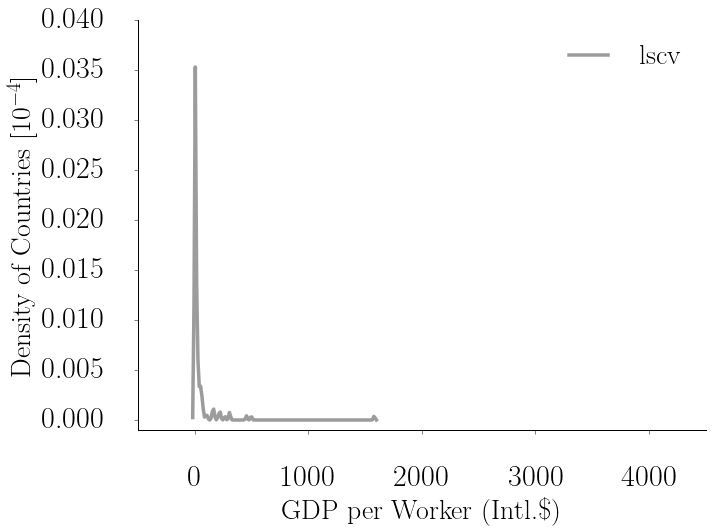

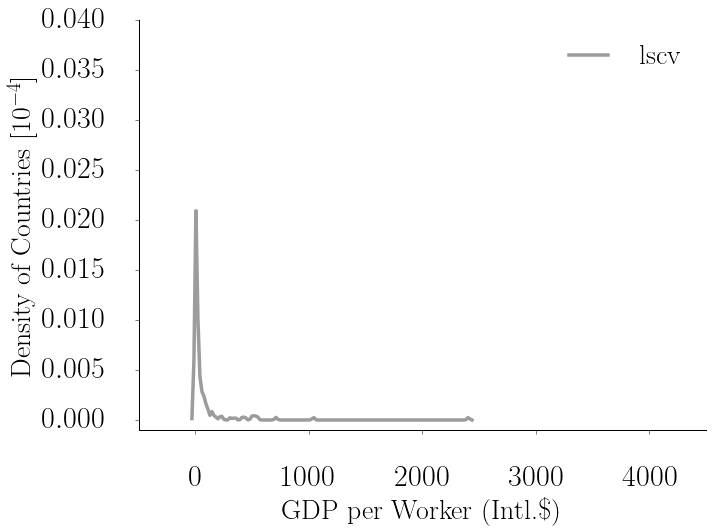

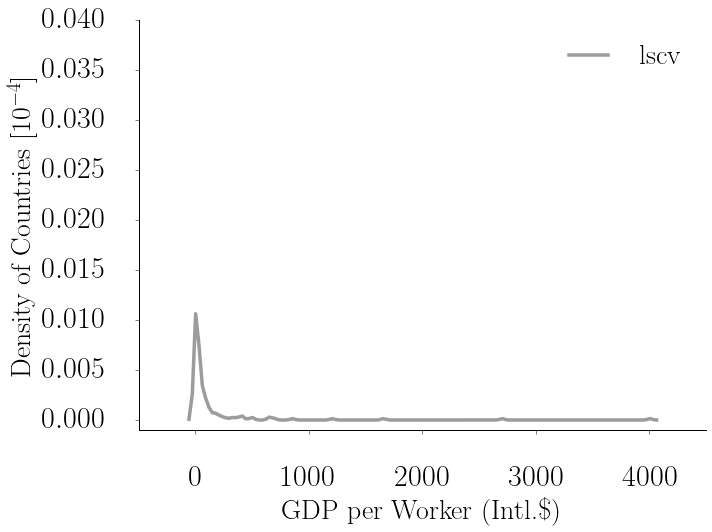

In [9]:
# Specify plot parameters.
plot_params = {
    'colour_bw': {'lscv': '#9C9C9C', 'silverman': '#484748'},
    'colour_bw_presentation': {'lscv': 'blue', 'silverman': 'black'},
    'figure_width': 10,
    'figure_height': 7.5,
    'font_size_labels': 28,
    'font_size_legend': 28,
    'font_size_ticks': 30,
    'line_width': 3.5,
    'title_size': 28
}

# Loop over all years and the specified bandwidth selection
# methods to plot estimated densities.
# for year in sorted(estimated_densities.keys()):
for year in [1970, 1990, 2010]:
    # Create figure.
    fig, ax = plt.subplots(
        figsize=(plot_params['figure_width'], plot_params['figure_height'])
    )

    for method in sorted(estimated_densities[year].keys()):
        # Use latex font.
        rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
        rc('text', usetex=True)

        # Create plot.
        ax.plot(
            estimated_densities[year][method]['support'],
            estimated_densities[year][method]['density'],
            color=plot_params['colour_bw'][method],
            label=method,
            linewidth=plot_params['line_width']
        )

        # Set axis limits.
        ax.set_xlim([-500, 4500])
        ax.set_ylim([-0.001, 0.04])

        # Set axis labels.
        ax.set_xlabel(
            'GDP per Worker (Intl.\$)',
            fontsize=plot_params['font_size_labels']
        )
        ax.set_ylabel(
            'Density of Countries [$10^{{-4}}$]',
            fontsize=plot_params['font_size_labels']
        )

        # Set axis ticks and tick labels.
        #plt.xticks(
        #    [-20000, 0, 20000, 40000, 60000, 80000, 100000, 120000],
        #    ['-20K', '0', '20K', '40K', '60K', '80K', '100K', '120K']
        #)
        ax.tick_params(
            axis='x', labelsize=plot_params['font_size_ticks'], direction='out'
        )
        ax.tick_params(
            axis='y', labelsize=plot_params['font_size_ticks'], direction='out'
        )

        # Use scientific notation for y axis.
        yfm = ax.yaxis.get_major_formatter()
        yfm.set_powerlimits([-4, 4])
        offset = ax.get_yaxis().get_offset_text()
        offset.set_visible(False)

        # Remove frame.
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

        # Add a legend.
        ax.legend(fontsize=plot_params['font_size_legend'], frameon=False)

        # Add a year as title.
        # plt.title(year, fontsize=plot_params['title_size'])

    # Remove whitespace around figure.
    plt.tight_layout()


In [10]:
data[data['weighted_rgdpwok'] >= 1000].isocode.unique()

array(['CH2', 'IND', 'JPN', 'USA'], dtype=object)

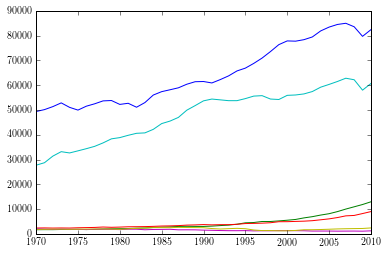

In [11]:
plt.plot(data[data['isocode'] == 'USA'].year, data[data['isocode'] == 'USA'].rgdpwok)
plt.plot(data[data['isocode'] == 'CH2'].year, data[data['isocode'] == 'CH2'].rgdpwok)
plt.plot(data[data['isocode'] == 'IND'].year, data[data['isocode'] == 'IND'].rgdpwok)
plt.plot(data[data['isocode'] == 'JPN'].year, data[data['isocode'] == 'JPN'].rgdpwok)
plt.plot(data[data['isocode'] == 'CAF'].year, data[data['isocode'] == 'CAF'].rgdpwok)
plt.plot(data[data['isocode'] == 'SLE'].year, data[data['isocode'] == 'SLE'].rgdpwok)

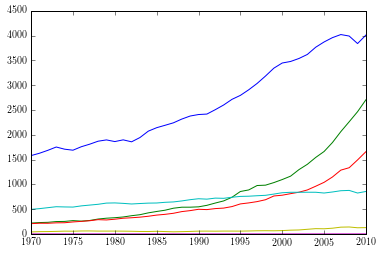

In [18]:
plt.plot(data[data['isocode'] == 'USA'].year, data[data['isocode'] == 'USA'].weighted_rgdpwok)
plt.plot(data[data['isocode'] == 'CH2'].year, data[data['isocode'] == 'CH2'].weighted_rgdpwok)
plt.plot(data[data['isocode'] == 'IND'].year, data[data['isocode'] == 'IND'].weighted_rgdpwok)
# plt.plot(data[data['isocode'] == 'JPN'].year, data[data['isocode'] == 'JPN'].weighted_rgdpwok)
plt.plot(data[data['isocode'] == 'GER'].year, data[data['isocode'] == 'GER'].weighted_rgdpwok)
plt.plot(data[data['isocode'] == 'CAF'].year, data[data['isocode'] == 'CAF'].weighted_rgdpwok)
plt.plot(data[data['isocode'] == 'NGA'].year, data[data['isocode'] == 'NGA'].weighted_rgdpwok)

In [13]:
sorted(data['isocode'].unique())

['AFG',
 'AGO',
 'ALB',
 'ARG',
 'AUS',
 'AUT',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLZ',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CH2',
 'CHE',
 'CHL',
 'CIV',
 'CMR',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYP',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'GAB',
 'GBR',
 'GER',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KEN',
 'KHM',
 'KOR',
 'LAO',
 'LBN',
 'LBR',
 'LKA',
 'LSO',
 'LUX',
 'MAC',
 'MAR',
 'MDG',
 'MDV',
 'MEX',
 'MLI',
 'MLT',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'PNG',
 'POL',
 'PRI',
 'PRT',
 'PRY',
 'ROM',
 'RWA',
 'SDN',
 'SEN',
 'SGP',
 'SLB',
 'SLE',
 'SLV',
 'SOM',
 'SUR',
 'SWE',
 'SWZ',
 'SYR',
 'TCD',


In [14]:
data[(data['weighted_rgdpwok'] > 50) & (data['weighted_rgdpwok'] < 250)   ].isocode.unique()

array(['DZA', 'ARG', 'AUS', 'AUT', 'BGD', 'BEL', 'BRA', 'CAN', 'CHL',
       'CH2', 'COL', 'DNK', 'EGY', 'FIN', 'GRC', 'HKG', 'HUN', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'KOR', 'MYS', 'MEX', 'MAR',
       'NLD', 'NGA', 'NOR', 'PAK', 'PER', 'PHL', 'POL', 'PRT', 'ROM',
       'SGP', 'ZAF', 'ESP', 'SWE', 'CHE', 'TWN', 'THA', 'TUR', 'VEN', 'VNM'], dtype=object)